In [100]:
import numpy as np 
import pandas as pd # for working with dataframes
import seaborn as sns # for data visualization 
from matplotlib import pyplot as plt # for plotting

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from xgboost import XGBClassifier
from sklearn.metrics import classification_report

from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split

In [101]:
#Different clasifier will be test in order to check which is the one which works best for clasifying a song in
#between big hit or not.

In [102]:
df = pd.read_csv('data/popularity.csv')
df


,Unnamed: 0,track_name,artist_name,sum_streams,avg_danceability,avg_energy,avg_loudness,avg_speechiness,avg_acousticness,avg_instrumentalness,avg_liveness,avg_valence,avg_tempo,avg_duration_ms,popularity,target
0,1,Shape of You,Ed Sheeran,2007865025,0.825000,0.652000,-3.183000,0.080200,0.581000,0.000000e+00,0.093100,0.931000,95.977000,233712.000000,1,1
1,2,God's Plan,Drake,1193354417,0.756000,0.450500,-9.210500,0.109500,0.032700,8.290000e-05,0.567500,0.351500,77.168500,198973.000000,2,1
2,3,Havana,Camila Cabello,1081243413,0.765000,0.523000,-4.333000,0.030000,0.184000,3.560000e-05,0.132000,0.394000,104.988000,217306.000000,3,1
3,4,Despacito - Remix,Luis Fonsi,1016932253,0.649000,0.798000,-4.346000,0.178000,0.226000,0.000000e+00,0.071100,0.857000,177.899000,230413.000000,4,1
4,5,New Rules,Dua Lipa,993805591,0.762000,0.700000,-6.021000,0.069400,0.002610,1.560000e-05,0.153000,0.608000,116.073000,209320.000000,5,1
5,6,rockstar,Post Malone,972969313,0.594000,0.507000,-6.141000,0.081600,0.145000,8.710000e-04,0.132000,0.137000,159.729000,218146.000000,6,1
6,7,Perfect,Ed Sheeran,912700821,0.599000,0.448000,-6.312000,0.023200,0.163000,0.000000e+00,0.106000,0.168000,95.050000,263400.000000,7,1
7,8,Believer,Imagine Dragons,910731153,0.776000,0.780000,-4.374000,0.128000,0.062200,0.000000e+00,0.081000,0.666000,124.949000,204346.000000,8,1
8,9,HUMBLE.,Kendrick Lamar,908138613,0.909333,0.582833,-6.709667,0.129833,0.000264,6.401667e-05,0.096000,0.391333,150.026667,177000.000000,9,1
9,10,XO TOUR Llif3,Lil Uzi Vert,896140415,0.727000,0.682000,-6.957500,0.173000,0.003650,0.000000e+00,0.107500,0.443000,154.999500,182717.000000,10,1


In [103]:
#taking feature between 0 and 1

features = ["avg_acousticness", "avg_danceability", "avg_energy", "avg_instrumentalness","avg_liveness", 
          "avg_speechiness", "avg_valence"]

In [104]:
X = df[features]
y = df['target']


In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=242)

In [106]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((13004, 7), (1445, 7), (13004,), (1445,))

In [107]:
#Linear Regression

LR_Model = LogisticRegression()
LR_Model.fit(X_train, y_train)
LR_Predict = LR_Model.predict(X_test)
LR_Accuracy = accuracy_score(y_test, LR_Predict)
print("Accuracy: " + str(LR_Accuracy))
print(classification_report(y_test,LR_Model.predict(X_test)))



Accuracy: 0.7480968858131488
             precision    recall  f1-score   support

          0       0.75      1.00      0.86      1081
          1       0.00      0.00      0.00       364

avg / total       0.56      0.75      0.64      1445



In [108]:
#Decision Tree

DT_Model = DecisionTreeClassifier()
DT_Model.fit(X_train, y_train)
DT_Predict = DT_Model.predict(X_test)
DT_Accuracy = accuracy_score(y_test, DT_Predict)
print("Accuracy: " + str(DT_Accuracy)+"%")
print(classification_report(y_test,DT_Model.predict(X_test)))



Accuracy: 0.639446366782007%
             precision    recall  f1-score   support

          0       0.76      0.76      0.76      1081
          1       0.28      0.29      0.29       364

avg / total       0.64      0.64      0.64      1445



In [109]:
#Support Vector Machine

LSVC_Model = DecisionTreeClassifier()
LSVC_Model.fit(X_train, y_train)
LSVC_Predict = LSVC_Model.predict(X_test)
LSVC_Accuracy = accuracy_score(y_test, LSVC_Predict)
print("Accuracy: " + str(LSVC_Accuracy)+"%")
print(classification_report(y_test,LSVC_Model.predict(X_test)))

Accuracy: 0.6207612456747404%
             precision    recall  f1-score   support

          0       0.76      0.73      0.74      1081
          1       0.27      0.30      0.28       364

avg / total       0.63      0.62      0.63      1445



In [110]:
#Random Forest

RFC_Model = RandomForestClassifier()
RFC_Model.fit(X_train, y_train)
RFC_Predict = RFC_Model.predict(X_test)
RFC_Accuracy = accuracy_score(y_test, RFC_Predict)

print("Accuracy: " + str(RFC_Accuracy)+"%")
print(classification_report(y_test,LSVC_Model.predict(X_test)))

Accuracy: 0.7384083044982699%
             precision    recall  f1-score   support

          0       0.76      0.73      0.74      1081
          1       0.27      0.30      0.28       364

avg / total       0.63      0.62      0.63      1445



In [111]:
#KNN

KNN_Model = KNeighborsClassifier()
KNN_Model.fit(X_train, y_train)
KNN_Predict = KNN_Model.predict(X_test)
KNN_Accuracy = accuracy_score(y_test, KNN_Predict)

print("Accuracy: " + str(KNN_Accuracy)+"%")
print(classification_report(y_test,KNN_Model.predict(X_test)))

Accuracy: 0.7072664359861591%
             precision    recall  f1-score   support

          0       0.76      0.90      0.82      1081
          1       0.31      0.14      0.19       364

avg / total       0.64      0.71      0.66      1445



In [112]:
XGB_Model = XGBClassifier(objective = "binary:logistic", n_estimators = 10, seed = 123)
XGB_Model.fit(X_train, y_train)
XGB_Predict = XGB_Model.predict(X_test)
XGB_Accuracy = accuracy_score(y_test, XGB_Predict)

print("Accuracy: " + str(XGB_Accuracy)+"%")
print(classification_report(y_test,XGB_Model.predict(X_test)))

Accuracy: 0.7474048442906575%
             precision    recall  f1-score   support

          0       0.75      1.00      0.86      1081
          1       0.33      0.00      0.01       364

avg / total       0.64      0.75      0.64      1445



In [113]:
XGB_Model.predict_proba(X_test) #va mirando la prob d que el punto sea 0 o sea 1

array([[0.7020238 , 0.2979762 ],
       [0.68167925, 0.31832072],
       [0.6599397 , 0.3400603 ],
       ...,
       [0.63144785, 0.36855215],
       [0.6884204 , 0.3115796 ],
       [0.63144785, 0.36855215]], dtype=float32)

In [114]:
print(XGB_Model.feature_importances_)



[0.06784713 0.33619094 0.0893013  0.1600821  0.18053946 0.07847929
 0.0875598 ]


In [115]:
colnames = ["acous","dance","engy","instr","live","speec","val"]


In [116]:
model_performance_accuracy = pd.DataFrame({'Model': ['LogisticRegression', 
                                                      'RandomForestClassifier', 
                                                      'KNeighborsClassifier',
                                                      'DecisionTreeClassifier',
                                                      'LinearSVC',
                                                      'XGBClassifier'],
                                            'Accuracy': [LR_Accuracy,
                                                         RFC_Accuracy,
                                                         KNN_Accuracy,
                                                         DT_Accuracy,
                                                         LSVC_Accuracy,
                                                         XGB_Accuracy]})

In [117]:
model_performance_accuracy.sort_values(by = "Accuracy", ascending = False)

,Model,Accuracy
0,LogisticRegression,0.748097
5,XGBClassifier,0.747405
1,RandomForestClassifier,0.738408
2,KNeighborsClassifier,0.707266
3,DecisionTreeClassifier,0.639446
4,LinearSVC,0.620761


In [118]:
#Logistic Regresion and XGBoost provided the best predictions on the training model

In [119]:
# feature importance
print(XGB_Model.feature_importances_)



[0.06784713 0.33619094 0.0893013  0.1600821  0.18053946 0.07847929
 0.0875598 ]


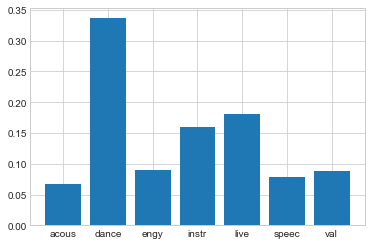

In [120]:
# plot
plt.bar(colnames, XGB_Model.feature_importances_)
plt.show()

In [121]:
#Danceability, Liveness and Instrumentalness are the more influence 